In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [112]:
data=pd.read_csv("C:\\Users\\atif_\\OneDrive\\Desktop\\DATA_SCIENCE_COURSE_(EXCELR)\\Multi Linear Regression\\50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [56]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [57]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


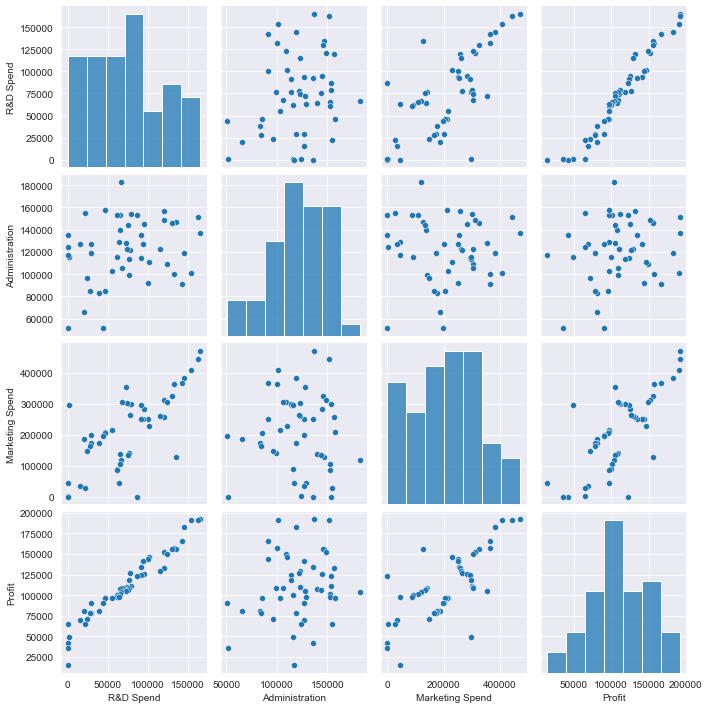

In [58]:
sns.set_style(style="darkgrid")
sns.pairplot(data)

In [59]:
data2=data.rename(columns = {"R&D Spend" : "Spend", "Marketing Spend" : "Marketing_Spend"})

In [60]:
data2.dtypes

Spend              float64
Administration     float64
Marketing_Spend    float64
State               object
Profit             float64
dtype: object

In [61]:
data2.head()

,Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Original Prediction without transformation of any data

In [62]:
import statsmodels.formula.api as smf
model1 = smf.ols('Profit~Administration+Spend+Marketing_Spend+State',data=data2).fit()

In [64]:
model1.params

Intercept            50125.343832
State[T.Florida]       198.788793
State[T.New York]      -41.887019
Administration          -0.027004
Spend                    0.806023
Marketing_Spend          0.026980
dtype: float64

In [63]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sat, 22 May 2021   Prob (F-statistic):           1.34e-27
Time:                        13:00:58   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
State[T.Florida]    198.7888   3371.007      0.059      0.953   -6595.030    6992.607
State[T.New York]   -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
Administration       -0.0270      0.052     -0.517      0.608      -0.132       0.078
Spend                 0.8060      0.046     17.369      0.000       0.712       0.900
Marketing_Spend       0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Since the p-value of State is >0.05 we can assume that the variable has No or Minimal effect on the model and its safe to drop the variable

# Simple Linear Regg using each variable

In [73]:
ml_administration = smf.ols('Profit~Administration',data=data2).fit()
print(ml_administration.tvalues, '\n', ml_administration.pvalues)  

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [77]:
ml_administration.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Sat, 22 May 2021   Prob (F-statistic):              0.162
Time:                        13:25:36   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [118]:
ml_RDSpend = smf.ols('Profit~Spend',data=data2).fit()
print(ml_RDSpend.tvalues, '\n', ml_RDSpend.pvalues)  
rdspend_rsq=ml_RDSpend.rsquared
rdspend_rsq

Intercept    19.320288
Spend        29.151139
dtype: float64 
 Intercept    2.782697e-24
Spend        3.500322e-32
dtype: float64


0.9465353160804392

In [121]:
ml_marketing_spend = smf.ols('Profit~Marketing_Spend',data=data2).fit()
print(ml_marketing_spend.tvalues, '\n', ml_marketing_spend.pvalues)  
marketing_spend_rsq=ml_marketing_spend.rsquared
marketing_spend_rsq

Intercept          7.808356
Marketing_Spend    7.802657
dtype: float64 
 Intercept          4.294735e-10
Marketing_Spend    4.381073e-10
dtype: float64


0.5591535746115515

In [80]:
ml_state = smf.ols('Profit~State',data=data2).fit()
print(ml_state.tvalues, '\n', ml_state.pvalues)  
ml_state.summary()

Intercept            10.536302
State[T.Florida]      1.049860
State[T.New York]     0.706364
dtype: float64 
 Intercept            5.774813e-14
State[T.Florida]     2.991510e-01
State[T.New York]    4.834492e-01
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.5748
Date:                Sat, 22 May 2021   Prob (F-statistic):              0.567
Time:                        13:29:40   Log-Likelihood:                -600.05
No. Observations:                  50   AIC:                             1206.
Df Residuals:                      47   BIC:                             1212.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.039e+05   9861.636     10.536      0.000    8.41e+04    1.24e+05
State[T.Florida]   1.487e+04   1.42e+04      1.050      0.299   -1.36e+04    4.34e+04
State[T.New York]  9851.2712   1.39e+04      0.706      0.483   -1.82e+04    3.79e+04
==============================================================================
Omnibus:                        0.111   Durbin-Watson:                   0.081
Prob(Omnibus):                  0.946   Jarque-Bera (JB):                0.207
Skew:                           0.104   Prob(JB):                        0.902
Kurtosis:                       2.762   Cond. No.                         3.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# So from the above calculated models for each variable, we can infer that R&D_Spend alone can explain/predict approx. 95% of the variation in the data.

# We can also infer that Marketing_Spend also can predict almost 56% of data variation.

# Therefore the other variables can be dropped exclusively as they have very minimal impact on the data modelling

In [87]:
ml_total_spend = smf.ols('Profit~Marketing_Spend+Spend',data=data2).fit()
print(ml_total_spend.tvalues, '\n', ml_total_spend.pvalues)
ml_total_spend.summary()

Intercept          17.463582
Marketing_Spend     1.927052
Spend              19.265555
dtype: float64 
 Intercept          3.504062e-22
Marketing_Spend    6.003040e-02
Spend              6.040433e-24
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sat, 22 May 2021   Prob (F-statistic):           2.16e-31
Time:                        13:47:41   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
Marketing_Spend     0.0299      0.016      1.927      0.060      -0.001       0.061
Spend               0.7966      0.041     19.266      0.000       0.713       0.880
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# So we now conclude that, individually, the marketing spend and R&D spend have huge impact but together, the marketing spend is not that good a variable

# VIF Values

In [88]:
rsq_profit = smf.ols('Profit~Administration+Marketing_Spend+State',data=data2).fit().rsquared
vif_profit=1/(1-rsq_profit)
vif_profit

2.5846973128646744

In [89]:
rsq_administration = smf.ols('Administration~Profit+Marketing_Spend+State',data=data2).fit().rsquared
vif_admin=1/(1-rsq_administration)
vif_admin

1.1325782334945893

In [90]:
rsq_Marketing_Spend = smf.ols('Marketing_Spend~Profit+Administration+State',data=data2).fit().rsquared
vif_Marketing_Spend=1/(1-rsq_Marketing_Spend)
vif_Marketing_Spend

2.5476474366828743

In [94]:
df={'Variables':['Profit','Administration','Marketing_Spend',], 'VIF':[vif_profit,vif_admin,vif_Marketing_Spend,]}
vif_frame=pd.DataFrame(df)
vif_frame

,Variables,VIF
0,Profit,2.584697
1,Administration,1.132578
2,Marketing_Spend,2.547647


# Residual Analysis

## Test for normality of residuals (Q-Q Plot)

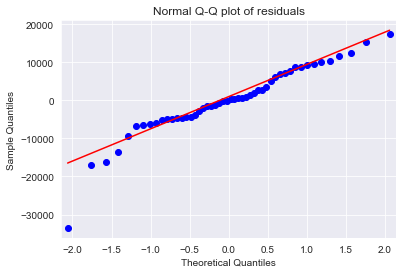

In [95]:
import statsmodels.api as sm
qqplot=sm.qqplot(model1.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [97]:
list(np.where(model1.resid<-30000))

[array([49], dtype=int64)]

### There's another assumption for the Linear Regression Problem that the residuals should be normally distributed and as seen in the above plot we can assume that most of the residuals are normally distributed except the data point 49 which is very different from the normal data

# Residual Plot for Homoscedasticity

### Another assumption for the linear regression problem is that the residuals should follow a uniform distribution. The Residuals should not converge or diverge to a point i.e not forming a conical shape on a plot.

In [98]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

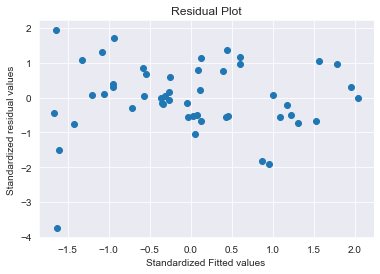

In [99]:
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

### So, as we can see in the plot above we can clearly say that there is NO HETEROSCADISTICITY 

# Residuals vs Regressors

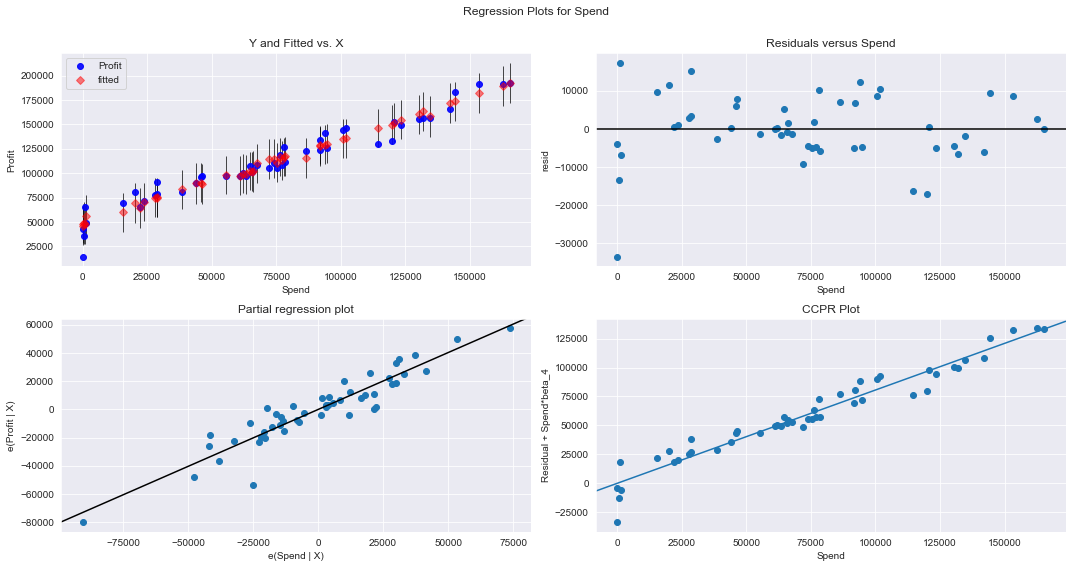

In [100]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Spend", fig=fig)
plt.show()

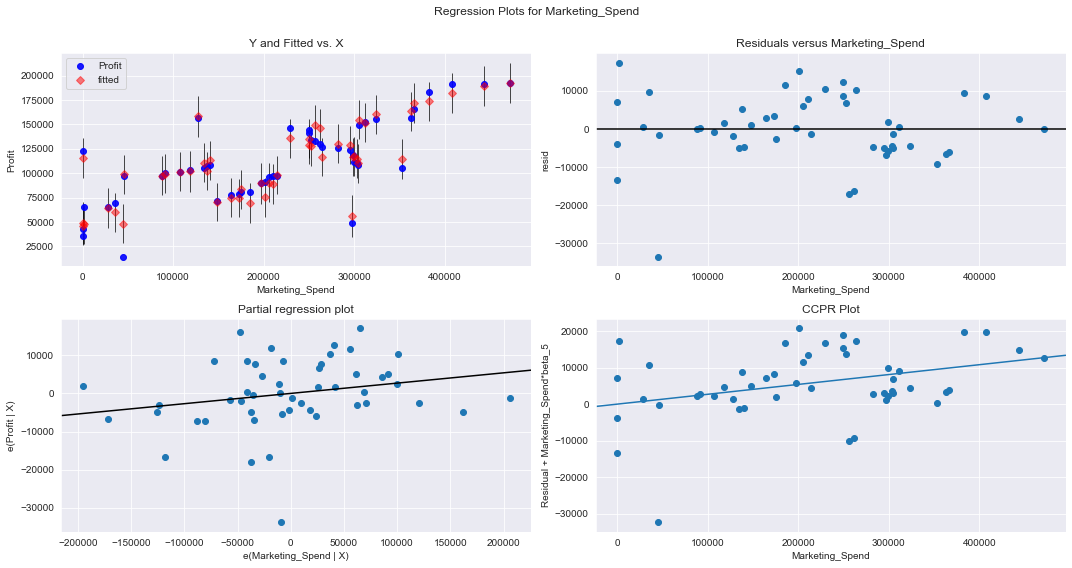

In [101]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Marketing_Spend", fig=fig)
plt.show()

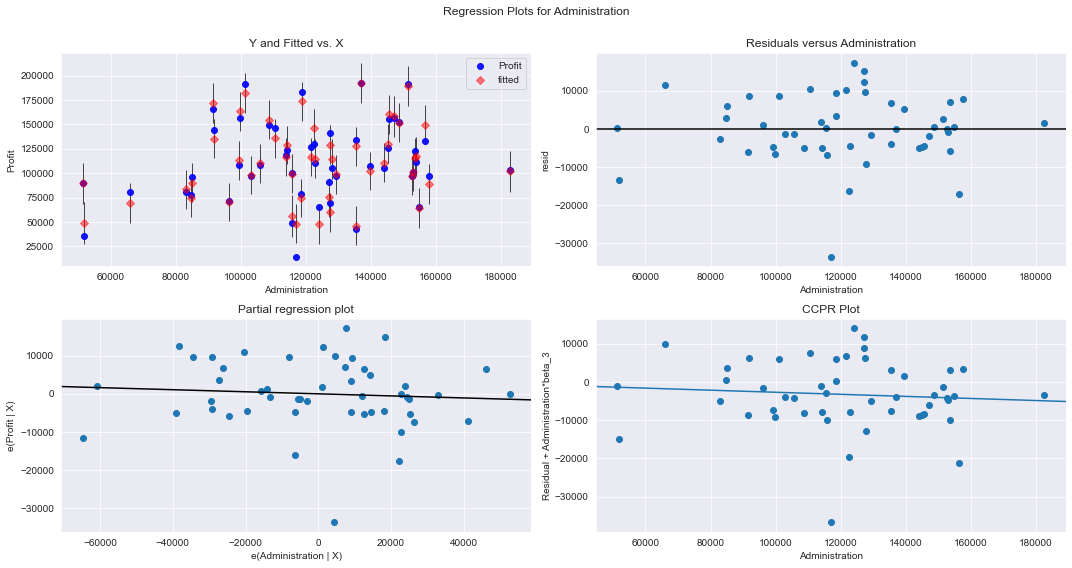

In [102]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Administration", fig=fig)
plt.show()

# Model Deletion Diagnostic

### Cook's Distance

In [104]:
model1_influence = model1.get_influence()
(c, _) = model1_influence.cooks_distance

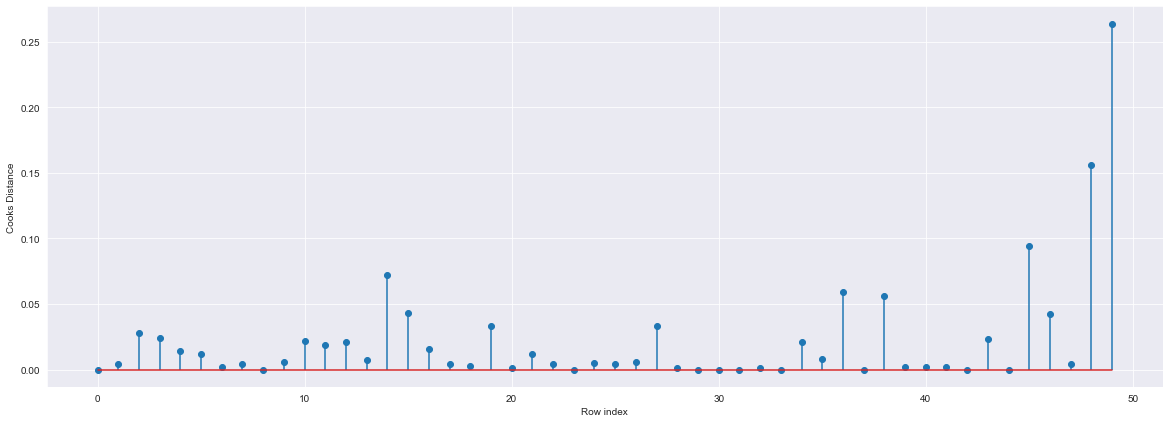

In [105]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [107]:
#index and value of influencer where c is more than .25
(np.argmax(c),np.max(c))

(49, 0.26395943586848275)

## High Influence points

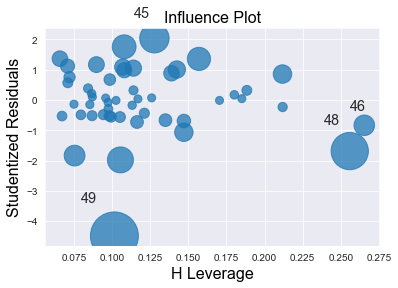

In [108]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)
plt.show()

In [109]:
data2.shape

(50, 5)

In [111]:
k = data2.shape[1]
n = data2.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

### So, finally concluding with all the diagnostics and validation, we can safely say that the data does not contain any invalid or irregular or abnormal value. Hence there is no need to change the original dataset

# Final Models

In [115]:
#Including all the variables
ml_final = smf.ols('Profit~Administration+Spend+Marketing_Spend+State',data=data2).fit()
ml_final.rsquared,ml_final.aic

(0.9507524843355148, 1062.764909597834)

In [113]:
#Excluding "Marketing_Spend" variable and predicting model
ml_final1= smf.ols('Profit~Administration+Spend+State',data=data2).fit()
ml_final1.rsquared,ml_final1.aic

(0.9479799298023537, 1063.503443921346)

In [114]:
#Excluding "R&D Spend" variable and predicting model
ml_final2= smf.ols('Profit~Administration+Marketing_Spend+State',data=data2).fit()
ml_final2.rsquared,ml_final2.aic

(0.6131075019799208, 1163.8293070259358)

In [124]:
d1 = {'Model':['R&D Spend','Marketing Spend','All Variables','Excluding Marketing_Spend','Excluding R&D_Spend'],
      'R_Squared Value':[rdspend_rsq,marketing_spend_rsq,ml_final.rsquared,ml_final1.rsquared,ml_final2.rsquared]}
Rsq_frame=pd.DataFrame(d1)
Rsq_frame

,Model,R_Squared Value
0,R&D Spend,0.946535
1,Marketing Spend,0.559154
2,All Variables,0.950752
3,Excluding Marketing_Spend,0.947980
4,Excluding R&D_Spend,0.613108


## With this we can conclude that the model "ml_final" is the best predictive model for the given data set